# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [68]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720710348014e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [72]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [74]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


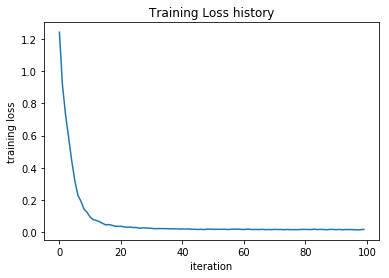

In [91]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [92]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [93]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

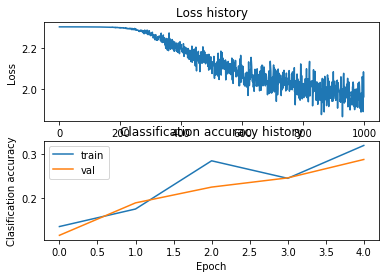

In [94]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

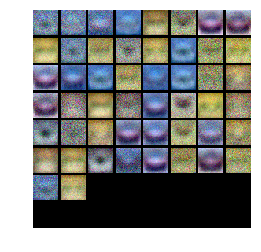

In [95]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [116]:
input_size = 32 * 32 * 3
hidden_size = 100
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.90,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 3000: loss 2.302897
iteration 100 / 3000: loss 1.981469
iteration 200 / 3000: loss 1.676451
iteration 300 / 3000: loss 1.694721
iteration 400 / 3000: loss 1.771107
iteration 500 / 3000: loss 1.547790
iteration 600 / 3000: loss 1.452147
iteration 700 / 3000: loss 1.657364
iteration 800 / 3000: loss 1.408557
iteration 900 / 3000: loss 1.519984
iteration 1000 / 3000: loss 1.442016
iteration 1100 / 3000: loss 1.410577
iteration 1200 / 3000: loss 1.478140
iteration 1300 / 3000: loss 1.307866
iteration 1400 / 3000: loss 1.389915
iteration 1500 / 3000: loss 1.427474
iteration 1600 / 3000: loss 1.313644
iteration 1700 / 3000: loss 1.258445
iteration 1800 / 3000: loss 1.302227
iteration 1900 / 3000: loss 1.265721
iteration 2000 / 3000: loss 1.173935
iteration 2100 / 3000: loss 1.268108
iteration 2200 / 3000: loss 1.400290
iteration 2300 / 3000: loss 1.268241
iteration 2400 / 3000: loss 1.220727
iteration 2500 / 3000: loss 1.241340
iteration 2600 / 3000: loss 1.347642
iteration 270

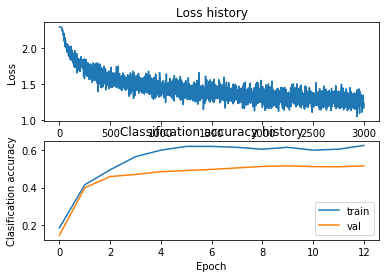

In [117]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [119]:
best_net = None # store the best model into this 
best_val_acc = -1

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
input_size = 32 * 32 * 3
hidden_sizes = [20, 100, 200]
num_classes = 10

batch_sizes = [50, 200, 400]
learning_rates = [5e-5, 1e-4, 5e-4, 1e-3, 2e-3]
learning_rate_decays = [0.9, 0.95, 0.98]
regs = [0.1, 0.25, 0.5]

results = {}

for hidden_size in hidden_sizes:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            for learning_rate_decay in learning_rate_decays:
                for reg in regs:
                    net = TwoLayerNet(input_size, hidden_size, num_classes)
                    stats = net.train(X_train, y_train, X_val, y_val,
                                num_iters=3000, batch_size=batch_size,
                                learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
                                reg=reg, verbose=True)

                    # Predict on the validation set
                    val_acc = (net.predict(X_val) == y_val).mean()
                    print('Validation accuracy: ', val_acc)
                    
                    # Predict on the training set
                    train_acc = (net.predict(X_train) == y_train).mean()
                    print('Training accuracy: ', train_acc)
                    
                    results[(hidden_size, batch_size, learning_rate, learning_rate_decay, reg)] = (train_acc, val_acc)
                    
                    print((hidden_size, batch_size, learning_rate, learning_rate_decay, reg))
                    print((train_acc, val_acc))

                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        best_net = net
                    
                    print()

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 3000: loss 2.302648
iteration 100 / 3000: loss 2.302583
iteration 200 / 3000: loss 2.302465
iteration 300 / 3000: loss 2.301838
iteration 400 / 3000: loss 2.299069
iteration 500 / 3000: loss 2.289971
iteration 600 / 3000: loss 2.288446
iteration 700 / 3000: loss 2.255967
iteration 800 / 3000: loss 2.285737
iteration 900 / 3000: loss 2.141075
iteration 1000 / 3000: loss 2.114814
iteration 1100 / 3000: loss 2.082674
iteration 1200 / 3000: loss 2.053204
iteration 1300 / 3000: loss 2.032073
iteration 1400 / 3000: loss 2.016069
iteration 1500 / 3000: loss 2.010311
iteration 1600 / 3000: loss 1.956914
iteration 1700 / 3000: loss 2.007491
iteration 1800 / 3000: loss 2.175198
iteration 1900 / 3000: loss 1.852007
iteration 2000 / 3000: loss 2.081582
iteration 2100 / 3000: loss 2.069968
iteration 2200 / 3000: loss 1.969306
iteration 2300 / 3000: loss 2.183818
iteration 2400 / 3000: loss 2.019198
iteration 2500 / 3000: loss 1.854410
iteration 2600 / 3000: loss 1.887446
iteration 270

iteration 2400 / 3000: loss 1.871051
iteration 2500 / 3000: loss 2.160840
iteration 2600 / 3000: loss 1.888240
iteration 2700 / 3000: loss 1.744410
iteration 2800 / 3000: loss 2.196828
iteration 2900 / 3000: loss 1.840966
Validation accuracy:  0.327
Training accuracy:  0.32808163265306123
(20, 50, 5e-05, 0.98, 0.1)
(0.32808163265306123, 0.327)

iteration 0 / 3000: loss 2.302728
iteration 100 / 3000: loss 2.302687
iteration 200 / 3000: loss 2.302468
iteration 300 / 3000: loss 2.302437
iteration 400 / 3000: loss 2.301772
iteration 500 / 3000: loss 2.291790
iteration 600 / 3000: loss 2.291775
iteration 700 / 3000: loss 2.249526
iteration 800 / 3000: loss 2.216783
iteration 900 / 3000: loss 2.177604
iteration 1000 / 3000: loss 2.103429
iteration 1100 / 3000: loss 2.107474
iteration 1200 / 3000: loss 2.072407
iteration 1300 / 3000: loss 2.008642
iteration 1400 / 3000: loss 2.132178
iteration 1500 / 3000: loss 1.999387
iteration 1600 / 3000: loss 2.106153
iteration 1700 / 3000: loss 2.014803

iteration 1500 / 3000: loss 1.913533
iteration 1600 / 3000: loss 1.823942
iteration 1700 / 3000: loss 2.071266
iteration 1800 / 3000: loss 1.737389
iteration 1900 / 3000: loss 1.800250
iteration 2000 / 3000: loss 2.020982
iteration 2100 / 3000: loss 1.755771
iteration 2200 / 3000: loss 1.947603
iteration 2300 / 3000: loss 1.578914
iteration 2400 / 3000: loss 1.762542
iteration 2500 / 3000: loss 1.702080
iteration 2600 / 3000: loss 1.786093
iteration 2700 / 3000: loss 1.653450
iteration 2800 / 3000: loss 1.764933
iteration 2900 / 3000: loss 1.785366
Validation accuracy:  0.389
Training accuracy:  0.3930408163265306
(20, 50, 0.0001, 0.95, 0.25)
(0.3930408163265306, 0.389)

iteration 0 / 3000: loss 2.302913
iteration 100 / 3000: loss 2.302754
iteration 200 / 3000: loss 2.301062
iteration 300 / 3000: loss 2.279110
iteration 400 / 3000: loss 2.250149
iteration 500 / 3000: loss 2.245257
iteration 600 / 3000: loss 2.213960
iteration 700 / 3000: loss 2.160405
iteration 800 / 3000: loss 2.05234

iteration 500 / 3000: loss 1.839682
iteration 600 / 3000: loss 1.830415
iteration 700 / 3000: loss 1.716970
iteration 800 / 3000: loss 1.458140
iteration 900 / 3000: loss 1.816673
iteration 1000 / 3000: loss 1.750206
iteration 1100 / 3000: loss 1.654973
iteration 1200 / 3000: loss 1.910629
iteration 1300 / 3000: loss 1.644713
iteration 1400 / 3000: loss 1.669865
iteration 1500 / 3000: loss 1.914847
iteration 1600 / 3000: loss 1.628437
iteration 1700 / 3000: loss 1.325182
iteration 1800 / 3000: loss 1.543198
iteration 1900 / 3000: loss 1.538600
iteration 2000 / 3000: loss 1.830584
iteration 2100 / 3000: loss 1.673694
iteration 2200 / 3000: loss 1.441892
iteration 2300 / 3000: loss 1.786654
iteration 2400 / 3000: loss 1.719933
iteration 2500 / 3000: loss 1.670719
iteration 2600 / 3000: loss 1.595924
iteration 2700 / 3000: loss 1.828561
iteration 2800 / 3000: loss 1.549053
iteration 2900 / 3000: loss 1.448378
Validation accuracy:  0.414
Training accuracy:  0.4354081632653061
(20, 50, 0.00

iteration 2900 / 3000: loss 1.634230
Validation accuracy:  0.43
Training accuracy:  0.44518367346938775
(20, 50, 0.0005, 0.98, 0.5)
(0.44518367346938775, 0.43)

iteration 0 / 3000: loss 2.302635
iteration 100 / 3000: loss 2.024492
iteration 200 / 3000: loss 1.816668
iteration 300 / 3000: loss 1.708970
iteration 400 / 3000: loss 1.681694
iteration 500 / 3000: loss 1.965805
iteration 600 / 3000: loss 1.942915
iteration 700 / 3000: loss 1.655438
iteration 800 / 3000: loss 1.819597
iteration 900 / 3000: loss 1.587645
iteration 1000 / 3000: loss 1.612606
iteration 1100 / 3000: loss 1.641651
iteration 1200 / 3000: loss 1.673099
iteration 1300 / 3000: loss 1.668387
iteration 1400 / 3000: loss 1.774277
iteration 1500 / 3000: loss 1.596036
iteration 1600 / 3000: loss 1.541584
iteration 1700 / 3000: loss 1.733171
iteration 1800 / 3000: loss 1.455996
iteration 1900 / 3000: loss 1.935956
iteration 2000 / 3000: loss 1.338835
iteration 2100 / 3000: loss 1.532613
iteration 2200 / 3000: loss 1.469549


iteration 2000 / 3000: loss 1.714340
iteration 2100 / 3000: loss 1.416752
iteration 2200 / 3000: loss 1.601406
iteration 2300 / 3000: loss 1.754603
iteration 2400 / 3000: loss 1.582748
iteration 2500 / 3000: loss 1.818850
iteration 2600 / 3000: loss 1.744771
iteration 2700 / 3000: loss 1.526225
iteration 2800 / 3000: loss 1.562500
iteration 2900 / 3000: loss 1.694313
Validation accuracy:  0.443
Training accuracy:  0.44746938775510203
(20, 50, 0.001, 0.98, 0.1)
(0.44746938775510203, 0.443)

iteration 0 / 3000: loss 2.302758
iteration 100 / 3000: loss 2.005329
iteration 200 / 3000: loss 1.662072
iteration 300 / 3000: loss 1.802249
iteration 400 / 3000: loss 1.761102
iteration 500 / 3000: loss 1.682533
iteration 600 / 3000: loss 1.650831
iteration 700 / 3000: loss 1.532793
iteration 800 / 3000: loss 1.985736
iteration 900 / 3000: loss 1.567138
iteration 1000 / 3000: loss 1.679410
iteration 1100 / 3000: loss 1.665336
iteration 1200 / 3000: loss 1.606981
iteration 1300 / 3000: loss 1.585064

iteration 1100 / 3000: loss 1.932105
iteration 1200 / 3000: loss 2.041010
iteration 1300 / 3000: loss 1.554601
iteration 1400 / 3000: loss 1.770416
iteration 1500 / 3000: loss 2.139507
iteration 1600 / 3000: loss 1.588038
iteration 1700 / 3000: loss 1.901865
iteration 1800 / 3000: loss 2.002059
iteration 1900 / 3000: loss 2.127022
iteration 2000 / 3000: loss 1.826442
iteration 2100 / 3000: loss 2.045900
iteration 2200 / 3000: loss 2.210001
iteration 2300 / 3000: loss 1.663075
iteration 2400 / 3000: loss 2.103196
iteration 2500 / 3000: loss 1.768866
iteration 2600 / 3000: loss 1.646756
iteration 2700 / 3000: loss 1.837218
iteration 2800 / 3000: loss 1.664547
iteration 2900 / 3000: loss 2.045988
Validation accuracy:  0.367
Training accuracy:  0.37842857142857145
(20, 50, 0.002, 0.95, 0.25)
(0.37842857142857145, 0.367)

iteration 0 / 3000: loss 2.302895
iteration 100 / 3000: loss 1.984720
iteration 200 / 3000: loss 1.788693
iteration 300 / 3000: loss 2.054255
iteration 400 / 3000: loss 2.

iteration 100 / 3000: loss 2.302830
iteration 200 / 3000: loss 2.302605
iteration 300 / 3000: loss 2.302342
iteration 400 / 3000: loss 2.301025
iteration 500 / 3000: loss 2.296896
iteration 600 / 3000: loss 2.287458
iteration 700 / 3000: loss 2.279175
iteration 800 / 3000: loss 2.242153
iteration 900 / 3000: loss 2.248061
iteration 1000 / 3000: loss 2.250420
iteration 1100 / 3000: loss 2.235926
iteration 1200 / 3000: loss 2.174819
iteration 1300 / 3000: loss 2.159571
iteration 1400 / 3000: loss 2.157701
iteration 1500 / 3000: loss 2.129994
iteration 1600 / 3000: loss 2.071005
iteration 1700 / 3000: loss 2.141782
iteration 1800 / 3000: loss 2.073380
iteration 1900 / 3000: loss 2.085714
iteration 2000 / 3000: loss 2.088762
iteration 2100 / 3000: loss 2.079308
iteration 2200 / 3000: loss 2.024956
iteration 2300 / 3000: loss 2.014314
iteration 2400 / 3000: loss 2.058789
iteration 2500 / 3000: loss 2.045457
iteration 2600 / 3000: loss 2.037993
iteration 2700 / 3000: loss 1.997649
iteration 

iteration 2500 / 3000: loss 1.902273
iteration 2600 / 3000: loss 1.843059
iteration 2700 / 3000: loss 1.871743
iteration 2800 / 3000: loss 1.868371
iteration 2900 / 3000: loss 1.898958
Validation accuracy:  0.313
Training accuracy:  0.3162244897959184
(20, 200, 5e-05, 0.98, 0.5)
(0.3162244897959184, 0.313)

iteration 0 / 3000: loss 2.302652
iteration 100 / 3000: loss 2.302372
iteration 200 / 3000: loss 2.300528
iteration 300 / 3000: loss 2.287760
iteration 400 / 3000: loss 2.176846
iteration 500 / 3000: loss 2.213178
iteration 600 / 3000: loss 2.109799
iteration 700 / 3000: loss 2.149649
iteration 800 / 3000: loss 2.113387
iteration 900 / 3000: loss 2.003773
iteration 1000 / 3000: loss 1.976088
iteration 1100 / 3000: loss 2.007344
iteration 1200 / 3000: loss 2.049199
iteration 1300 / 3000: loss 2.008099
iteration 1400 / 3000: loss 1.944154
iteration 1500 / 3000: loss 2.018448
iteration 1600 / 3000: loss 1.837595
iteration 1700 / 3000: loss 2.000189
iteration 1800 / 3000: loss 1.896902


iteration 1700 / 3000: loss 1.868345
iteration 1800 / 3000: loss 1.789497
iteration 1900 / 3000: loss 1.747252
iteration 2000 / 3000: loss 1.691123
iteration 2100 / 3000: loss 1.741884
iteration 2200 / 3000: loss 1.823943
iteration 2300 / 3000: loss 1.719172
iteration 2400 / 3000: loss 1.684886
iteration 2500 / 3000: loss 1.736488
iteration 2600 / 3000: loss 1.793644
iteration 2700 / 3000: loss 1.674704
iteration 2800 / 3000: loss 1.704357
iteration 2900 / 3000: loss 1.545244
Validation accuracy:  0.401
Training accuracy:  0.3979591836734694
(20, 200, 0.0001, 0.98, 0.1)
(0.3979591836734694, 0.401)

iteration 0 / 3000: loss 2.302746
iteration 100 / 3000: loss 2.302586
iteration 200 / 3000: loss 2.301224
iteration 300 / 3000: loss 2.288843
iteration 400 / 3000: loss 2.227904
iteration 500 / 3000: loss 2.160020
iteration 600 / 3000: loss 2.093922
iteration 700 / 3000: loss 2.038684
iteration 800 / 3000: loss 2.042561
iteration 900 / 3000: loss 1.976185
iteration 1000 / 3000: loss 1.980457

iteration 700 / 3000: loss 1.831166
iteration 800 / 3000: loss 1.592469
iteration 900 / 3000: loss 1.790875
iteration 1000 / 3000: loss 1.791397
iteration 1100 / 3000: loss 1.591288
iteration 1200 / 3000: loss 1.593550
iteration 1300 / 3000: loss 1.615255
iteration 1400 / 3000: loss 1.594607
iteration 1500 / 3000: loss 1.595418
iteration 1600 / 3000: loss 1.631036
iteration 1700 / 3000: loss 1.709333
iteration 1800 / 3000: loss 1.540181
iteration 1900 / 3000: loss 1.505371
iteration 2000 / 3000: loss 1.668978
iteration 2100 / 3000: loss 1.507221
iteration 2200 / 3000: loss 1.570210
iteration 2300 / 3000: loss 1.542814
iteration 2400 / 3000: loss 1.511790
iteration 2500 / 3000: loss 1.396480
iteration 2600 / 3000: loss 1.532255
iteration 2700 / 3000: loss 1.566714
iteration 2800 / 3000: loss 1.481045
iteration 2900 / 3000: loss 1.552941
Validation accuracy:  0.466
Training accuracy:  0.47922448979591836
(20, 200, 0.0005, 0.95, 0.25)
(0.47922448979591836, 0.466)

iteration 0 / 3000: loss

Training accuracy:  0.48848979591836733
(20, 200, 0.001, 0.9, 0.25)
(0.48848979591836733, 0.465)

iteration 0 / 3000: loss 2.302891
iteration 100 / 3000: loss 1.970426
iteration 200 / 3000: loss 1.845276
iteration 300 / 3000: loss 1.805656
iteration 400 / 3000: loss 1.659765
iteration 500 / 3000: loss 1.735567
iteration 600 / 3000: loss 1.705331
iteration 700 / 3000: loss 1.724579
iteration 800 / 3000: loss 1.588873
iteration 900 / 3000: loss 1.727837
iteration 1000 / 3000: loss 1.650925
iteration 1100 / 3000: loss 1.639861
iteration 1200 / 3000: loss 1.447530
iteration 1300 / 3000: loss 1.590645
iteration 1400 / 3000: loss 1.539521
iteration 1500 / 3000: loss 1.506730
iteration 1600 / 3000: loss 1.615178
iteration 1700 / 3000: loss 1.522126
iteration 1800 / 3000: loss 1.621191
iteration 1900 / 3000: loss 1.661314
iteration 2000 / 3000: loss 1.578943
iteration 2100 / 3000: loss 1.634336
iteration 2200 / 3000: loss 1.574907
iteration 2300 / 3000: loss 1.585352
iteration 2400 / 3000: los

iteration 2100 / 3000: loss 1.554179
iteration 2200 / 3000: loss 1.641256
iteration 2300 / 3000: loss 1.604327
iteration 2400 / 3000: loss 1.616371
iteration 2500 / 3000: loss 1.587186
iteration 2600 / 3000: loss 1.648005
iteration 2700 / 3000: loss 1.607096
iteration 2800 / 3000: loss 1.652505
iteration 2900 / 3000: loss 1.546423
Validation accuracy:  0.444
Training accuracy:  0.46279591836734696
(20, 200, 0.001, 0.98, 0.5)
(0.46279591836734696, 0.444)

iteration 0 / 3000: loss 2.302646
iteration 100 / 3000: loss 1.895886
iteration 200 / 3000: loss 1.722691
iteration 300 / 3000: loss 1.707736
iteration 400 / 3000: loss 1.559493
iteration 500 / 3000: loss 1.664284
iteration 600 / 3000: loss 1.566978
iteration 700 / 3000: loss 1.573981
iteration 800 / 3000: loss 1.552697
iteration 900 / 3000: loss 1.544425
iteration 1000 / 3000: loss 1.447671
iteration 1100 / 3000: loss 1.533194
iteration 1200 / 3000: loss 1.639416
iteration 1300 / 3000: loss 1.530630
iteration 1400 / 3000: loss 1.45205

iteration 1200 / 3000: loss 1.421173
iteration 1300 / 3000: loss 1.519254
iteration 1400 / 3000: loss 1.521977
iteration 1500 / 3000: loss 1.552716
iteration 1600 / 3000: loss 1.701167
iteration 1700 / 3000: loss 1.642520
iteration 1800 / 3000: loss 1.689327
iteration 1900 / 3000: loss 1.618501
iteration 2000 / 3000: loss 1.401421
iteration 2100 / 3000: loss 1.523602
iteration 2200 / 3000: loss 1.577502
iteration 2300 / 3000: loss 1.484197
iteration 2400 / 3000: loss 1.510668
iteration 2500 / 3000: loss 1.495794
iteration 2600 / 3000: loss 1.491590
iteration 2700 / 3000: loss 1.598151
iteration 2800 / 3000: loss 1.453034
iteration 2900 / 3000: loss 1.603191
Validation accuracy:  0.433
Training accuracy:  0.4764897959183673
(20, 200, 0.002, 0.98, 0.1)
(0.4764897959183673, 0.433)

iteration 0 / 3000: loss 2.302746
iteration 100 / 3000: loss 1.918196
iteration 200 / 3000: loss 1.797588
iteration 300 / 3000: loss 1.740947
iteration 400 / 3000: loss 1.730413
iteration 500 / 3000: loss 1.778

iteration 200 / 3000: loss 2.302623
iteration 300 / 3000: loss 2.302302
iteration 400 / 3000: loss 2.301492
iteration 500 / 3000: loss 2.299555
iteration 600 / 3000: loss 2.293355
iteration 700 / 3000: loss 2.269552
iteration 800 / 3000: loss 2.246977
iteration 900 / 3000: loss 2.223952
iteration 1000 / 3000: loss 2.181869
iteration 1100 / 3000: loss 2.133165
iteration 1200 / 3000: loss 2.089056
iteration 1300 / 3000: loss 2.101822
iteration 1400 / 3000: loss 2.037310
iteration 1500 / 3000: loss 2.101876
iteration 1600 / 3000: loss 2.045725
iteration 1700 / 3000: loss 2.006730
iteration 1800 / 3000: loss 2.050919
iteration 1900 / 3000: loss 2.022409
iteration 2000 / 3000: loss 1.978731
iteration 2100 / 3000: loss 1.899963
iteration 2200 / 3000: loss 1.957430
iteration 2300 / 3000: loss 1.975608
iteration 2400 / 3000: loss 1.974332
iteration 2500 / 3000: loss 1.938839
iteration 2600 / 3000: loss 1.928511
iteration 2700 / 3000: loss 1.877184
iteration 2800 / 3000: loss 1.955370
iteration

iteration 2600 / 3000: loss 1.857706
iteration 2700 / 3000: loss 1.830306
iteration 2800 / 3000: loss 1.800184
iteration 2900 / 3000: loss 1.856968
Validation accuracy:  0.348
Training accuracy:  0.34648979591836737
(20, 400, 0.0001, 0.9, 0.25)
(0.34648979591836737, 0.348)

iteration 0 / 3000: loss 2.302878
iteration 100 / 3000: loss 2.302721
iteration 200 / 3000: loss 2.301097
iteration 300 / 3000: loss 2.290945
iteration 400 / 3000: loss 2.255755
iteration 500 / 3000: loss 2.223988
iteration 600 / 3000: loss 2.136948
iteration 700 / 3000: loss 2.091162
iteration 800 / 3000: loss 2.046740
iteration 900 / 3000: loss 2.047768
iteration 1000 / 3000: loss 2.000787
iteration 1100 / 3000: loss 2.038149
iteration 1200 / 3000: loss 2.012648
iteration 1300 / 3000: loss 1.972257
iteration 1400 / 3000: loss 1.931879
iteration 1500 / 3000: loss 1.974477
iteration 1600 / 3000: loss 1.926697
iteration 1700 / 3000: loss 1.928144
iteration 1800 / 3000: loss 1.860582
iteration 1900 / 3000: loss 1.9906

iteration 1600 / 3000: loss 1.843607
iteration 1700 / 3000: loss 1.827220
iteration 1800 / 3000: loss 1.798142
iteration 1900 / 3000: loss 1.767978
iteration 2000 / 3000: loss 1.811463
iteration 2100 / 3000: loss 1.791805
iteration 2200 / 3000: loss 1.780094
iteration 2300 / 3000: loss 1.722832
iteration 2400 / 3000: loss 1.772452
iteration 2500 / 3000: loss 1.747797
iteration 2600 / 3000: loss 1.742527
iteration 2700 / 3000: loss 1.744534
iteration 2800 / 3000: loss 1.797929
iteration 2900 / 3000: loss 1.770504
Validation accuracy:  0.386
Training accuracy:  0.3903061224489796
(20, 400, 0.0001, 0.98, 0.5)
(0.3903061224489796, 0.386)

iteration 0 / 3000: loss 2.302646
iteration 100 / 3000: loss 2.143434
iteration 200 / 3000: loss 1.964021
iteration 300 / 3000: loss 1.893288
iteration 400 / 3000: loss 1.723163
iteration 500 / 3000: loss 1.753429
iteration 600 / 3000: loss 1.732099
iteration 700 / 3000: loss 1.656888
iteration 800 / 3000: loss 1.718747
iteration 900 / 3000: loss 1.716513

iteration 600 / 3000: loss 1.712772
iteration 700 / 3000: loss 1.663606
iteration 800 / 3000: loss 1.599565
iteration 900 / 3000: loss 1.646036
iteration 1000 / 3000: loss 1.657766
iteration 1100 / 3000: loss 1.583124
iteration 1200 / 3000: loss 1.626428
iteration 1300 / 3000: loss 1.463506
iteration 1400 / 3000: loss 1.608717
iteration 1500 / 3000: loss 1.557503
iteration 1600 / 3000: loss 1.611208
iteration 1700 / 3000: loss 1.537634
iteration 1800 / 3000: loss 1.588008
iteration 1900 / 3000: loss 1.516558
iteration 2000 / 3000: loss 1.579889
iteration 2100 / 3000: loss 1.481595
iteration 2200 / 3000: loss 1.535657
iteration 2300 / 3000: loss 1.433489
iteration 2400 / 3000: loss 1.549753
iteration 2500 / 3000: loss 1.447744
iteration 2600 / 3000: loss 1.404023
iteration 2700 / 3000: loss 1.391057
iteration 2800 / 3000: loss 1.584339
iteration 2900 / 3000: loss 1.428115
Validation accuracy:  0.476
Training accuracy:  0.4931632653061224
(20, 400, 0.0005, 0.98, 0.1)
(0.4931632653061224,

Validation accuracy:  0.469
Training accuracy:  0.5074489795918368
(20, 400, 0.001, 0.95, 0.1)
(0.5074489795918368, 0.469)

iteration 0 / 3000: loss 2.302738
iteration 100 / 3000: loss 2.026817
iteration 200 / 3000: loss 1.869793
iteration 300 / 3000: loss 1.700908
iteration 400 / 3000: loss 1.709823
iteration 500 / 3000: loss 1.657204
iteration 600 / 3000: loss 1.689536
iteration 700 / 3000: loss 1.667344
iteration 800 / 3000: loss 1.638645
iteration 900 / 3000: loss 1.525850
iteration 1000 / 3000: loss 1.581503
iteration 1100 / 3000: loss 1.607391
iteration 1200 / 3000: loss 1.625422
iteration 1300 / 3000: loss 1.560126
iteration 1400 / 3000: loss 1.544469
iteration 1500 / 3000: loss 1.620657
iteration 1600 / 3000: loss 1.458543
iteration 1700 / 3000: loss 1.569999
iteration 1800 / 3000: loss 1.576668
iteration 1900 / 3000: loss 1.490466
iteration 2000 / 3000: loss 1.530165
iteration 2100 / 3000: loss 1.481752
iteration 2200 / 3000: loss 1.544520
iteration 2300 / 3000: loss 1.502225


iteration 2100 / 3000: loss 1.551874
iteration 2200 / 3000: loss 1.475294
iteration 2300 / 3000: loss 1.481033
iteration 2400 / 3000: loss 1.483509
iteration 2500 / 3000: loss 1.535813
iteration 2600 / 3000: loss 1.484401
iteration 2700 / 3000: loss 1.543201
iteration 2800 / 3000: loss 1.495986
iteration 2900 / 3000: loss 1.494804
Validation accuracy:  0.467
Training accuracy:  0.5057959183673469
(20, 400, 0.002, 0.9, 0.25)
(0.5057959183673469, 0.467)

iteration 0 / 3000: loss 2.302891
iteration 100 / 3000: loss 1.852785
iteration 200 / 3000: loss 1.698278
iteration 300 / 3000: loss 1.735741
iteration 400 / 3000: loss 1.639541
iteration 500 / 3000: loss 1.675435
iteration 600 / 3000: loss 1.691958
iteration 700 / 3000: loss 1.673275
iteration 800 / 3000: loss 1.626458
iteration 900 / 3000: loss 1.565390
iteration 1000 / 3000: loss 1.630050
iteration 1100 / 3000: loss 1.635983
iteration 1200 / 3000: loss 1.604531
iteration 1300 / 3000: loss 1.503455
iteration 1400 / 3000: loss 1.577859


iteration 1200 / 3000: loss 1.725062
iteration 1300 / 3000: loss 1.610618
iteration 1400 / 3000: loss 1.609209
iteration 1500 / 3000: loss 1.597738
iteration 1600 / 3000: loss 1.524203
iteration 1700 / 3000: loss 1.630585
iteration 1800 / 3000: loss 1.573600
iteration 1900 / 3000: loss 1.621873
iteration 2000 / 3000: loss 1.608744
iteration 2100 / 3000: loss 1.608784
iteration 2200 / 3000: loss 1.609063
iteration 2300 / 3000: loss 1.721800
iteration 2400 / 3000: loss 1.562747
iteration 2500 / 3000: loss 1.538314
iteration 2600 / 3000: loss 1.616084
iteration 2700 / 3000: loss 1.606911
iteration 2800 / 3000: loss 1.675160
iteration 2900 / 3000: loss 1.663242
Validation accuracy:  0.47
Training accuracy:  0.47775510204081634
(20, 400, 0.002, 0.98, 0.5)
(0.47775510204081634, 0.47)

iteration 0 / 3000: loss 2.302904
iteration 100 / 3000: loss 2.302665
iteration 200 / 3000: loss 2.301931
iteration 300 / 3000: loss 2.300722
iteration 400 / 3000: loss 2.291975
iteration 500 / 3000: loss 2.284

iteration 200 / 3000: loss 2.301997
iteration 300 / 3000: loss 2.299765
iteration 400 / 3000: loss 2.289933
iteration 500 / 3000: loss 2.286477
iteration 600 / 3000: loss 2.251309
iteration 700 / 3000: loss 2.213651
iteration 800 / 3000: loss 2.198711
iteration 900 / 3000: loss 2.164733
iteration 1000 / 3000: loss 1.966768
iteration 1100 / 3000: loss 2.026867
iteration 1200 / 3000: loss 2.071012
iteration 1300 / 3000: loss 1.988061
iteration 1400 / 3000: loss 1.974966
iteration 1500 / 3000: loss 1.967547
iteration 1600 / 3000: loss 2.101778
iteration 1700 / 3000: loss 2.076104
iteration 1800 / 3000: loss 1.888650
iteration 1900 / 3000: loss 1.946954
iteration 2000 / 3000: loss 1.903054
iteration 2100 / 3000: loss 1.840072
iteration 2200 / 3000: loss 1.762485
iteration 2300 / 3000: loss 1.827339
iteration 2400 / 3000: loss 1.863792
iteration 2500 / 3000: loss 1.829946
iteration 2600 / 3000: loss 1.898603
iteration 2700 / 3000: loss 1.815189
iteration 2800 / 3000: loss 1.827759
iteration

iteration 2600 / 3000: loss 1.920886
iteration 2700 / 3000: loss 1.673048
iteration 2800 / 3000: loss 1.785057
iteration 2900 / 3000: loss 1.835637
Validation accuracy:  0.429
Training accuracy:  0.41322448979591836
(100, 50, 0.0001, 0.95, 0.1)
(0.41322448979591836, 0.429)

iteration 0 / 3000: loss 2.303300
iteration 100 / 3000: loss 2.302642
iteration 200 / 3000: loss 2.298147
iteration 300 / 3000: loss 2.241692
iteration 400 / 3000: loss 2.147345
iteration 500 / 3000: loss 2.082147
iteration 600 / 3000: loss 2.137677
iteration 700 / 3000: loss 2.073703
iteration 800 / 3000: loss 2.167266
iteration 900 / 3000: loss 1.837469
iteration 1000 / 3000: loss 1.826189
iteration 1100 / 3000: loss 1.854594
iteration 1200 / 3000: loss 1.830792
iteration 1300 / 3000: loss 1.974299
iteration 1400 / 3000: loss 1.976556
iteration 1500 / 3000: loss 1.941357
iteration 1600 / 3000: loss 1.602542
iteration 1700 / 3000: loss 1.867684
iteration 1800 / 3000: loss 1.838837
iteration 1900 / 3000: loss 1.7719

iteration 1600 / 3000: loss 1.426243
iteration 1700 / 3000: loss 1.569380
iteration 1800 / 3000: loss 1.666587
iteration 1900 / 3000: loss 1.461308
iteration 2000 / 3000: loss 1.832255
iteration 2100 / 3000: loss 1.842459
iteration 2200 / 3000: loss 1.574179
iteration 2300 / 3000: loss 1.386908
iteration 2400 / 3000: loss 1.419647
iteration 2500 / 3000: loss 1.513356
iteration 2600 / 3000: loss 1.856435
iteration 2700 / 3000: loss 1.591221
iteration 2800 / 3000: loss 1.679089
iteration 2900 / 3000: loss 1.375247
Validation accuracy:  0.482
Training accuracy:  0.5055306122448979
(100, 50, 0.0005, 0.9, 0.25)
(0.5055306122448979, 0.482)

iteration 0 / 3000: loss 2.304102
iteration 100 / 3000: loss 2.104586
iteration 200 / 3000: loss 1.923347
iteration 300 / 3000: loss 1.898897
iteration 400 / 3000: loss 1.895956
iteration 500 / 3000: loss 1.680265
iteration 600 / 3000: loss 1.600500
iteration 700 / 3000: loss 1.536672
iteration 800 / 3000: loss 1.802573
iteration 900 / 3000: loss 1.648695

iteration 600 / 3000: loss 1.703659
iteration 700 / 3000: loss 1.905739
iteration 800 / 3000: loss 1.689832
iteration 900 / 3000: loss 1.747051
iteration 1000 / 3000: loss 1.539980
iteration 1100 / 3000: loss 1.419791
iteration 1200 / 3000: loss 1.709157
iteration 1300 / 3000: loss 1.658144
iteration 1400 / 3000: loss 1.781958
iteration 1500 / 3000: loss 1.596263
iteration 1600 / 3000: loss 1.649881
iteration 1700 / 3000: loss 1.576191
iteration 1800 / 3000: loss 1.423307
iteration 1900 / 3000: loss 1.588574
iteration 2000 / 3000: loss 1.474767
iteration 2100 / 3000: loss 1.822500
iteration 2200 / 3000: loss 1.560241
iteration 2300 / 3000: loss 1.699989
iteration 2400 / 3000: loss 1.619693
iteration 2500 / 3000: loss 1.585861
iteration 2600 / 3000: loss 1.906997
iteration 2700 / 3000: loss 1.732437
iteration 2800 / 3000: loss 1.419679
iteration 2900 / 3000: loss 1.869306
Validation accuracy:  0.46
Training accuracy:  0.48814285714285716
(100, 50, 0.0005, 0.98, 0.5)
(0.48814285714285716

Validation accuracy:  0.43
Training accuracy:  0.4701020408163265
(100, 50, 0.001, 0.95, 0.5)
(0.4701020408163265, 0.43)

iteration 0 / 3000: loss 2.302880
iteration 100 / 3000: loss 1.963629
iteration 200 / 3000: loss 1.878969
iteration 300 / 3000: loss 1.906634
iteration 400 / 3000: loss 1.892806
iteration 500 / 3000: loss 1.783999
iteration 600 / 3000: loss 1.514970
iteration 700 / 3000: loss 1.704850
iteration 800 / 3000: loss 1.642000
iteration 900 / 3000: loss 1.668065
iteration 1000 / 3000: loss 1.453844
iteration 1100 / 3000: loss 1.563159
iteration 1200 / 3000: loss 1.577511
iteration 1300 / 3000: loss 1.664549
iteration 1400 / 3000: loss 1.503936
iteration 1500 / 3000: loss 1.594977
iteration 1600 / 3000: loss 1.735709
iteration 1700 / 3000: loss 1.359021
iteration 1800 / 3000: loss 1.865363
iteration 1900 / 3000: loss 1.568060
iteration 2000 / 3000: loss 1.680733
iteration 2100 / 3000: loss 1.708417
iteration 2200 / 3000: loss 1.353721
iteration 2300 / 3000: loss 1.433987
it

iteration 2100 / 3000: loss 1.882659
iteration 2200 / 3000: loss 2.406761
iteration 2300 / 3000: loss 1.580896
iteration 2400 / 3000: loss 1.692656
iteration 2500 / 3000: loss 1.721332
iteration 2600 / 3000: loss 2.011464
iteration 2700 / 3000: loss 1.755128
iteration 2800 / 3000: loss 2.248618
iteration 2900 / 3000: loss 2.090162
Validation accuracy:  0.415
Training accuracy:  0.4299183673469388
(100, 50, 0.002, 0.95, 0.1)
(0.4299183673469388, 0.415)

iteration 0 / 3000: loss 2.303435
iteration 100 / 3000: loss 1.944259
iteration 200 / 3000: loss 2.042772
iteration 300 / 3000: loss 1.925691
iteration 400 / 3000: loss 2.031335
iteration 500 / 3000: loss 1.740600
iteration 600 / 3000: loss 1.827423
iteration 700 / 3000: loss 1.591671
iteration 800 / 3000: loss 1.854056
iteration 900 / 3000: loss 2.100011
iteration 1000 / 3000: loss 2.034292
iteration 1100 / 3000: loss 1.650498
iteration 1200 / 3000: loss 1.659571
iteration 1300 / 3000: loss 1.860378
iteration 1400 / 3000: loss 1.422311


iteration 1200 / 3000: loss 2.114633
iteration 1300 / 3000: loss 2.183719
iteration 1400 / 3000: loss 2.074319
iteration 1500 / 3000: loss 2.072406
iteration 1600 / 3000: loss 2.093737
iteration 1700 / 3000: loss 2.032992
iteration 1800 / 3000: loss 2.042393
iteration 1900 / 3000: loss 2.053177
iteration 2000 / 3000: loss 2.016593
iteration 2100 / 3000: loss 2.040377
iteration 2200 / 3000: loss 1.984058
iteration 2300 / 3000: loss 1.986695
iteration 2400 / 3000: loss 1.984331
iteration 2500 / 3000: loss 1.979079
iteration 2600 / 3000: loss 1.938426
iteration 2700 / 3000: loss 1.974803
iteration 2800 / 3000: loss 2.061189
iteration 2900 / 3000: loss 1.949125
Validation accuracy:  0.275
Training accuracy:  0.2796326530612245
(100, 200, 5e-05, 0.9, 0.25)
(0.2796326530612245, 0.275)

iteration 0 / 3000: loss 2.304127
iteration 100 / 3000: loss 2.303885
iteration 200 / 3000: loss 2.303329
iteration 300 / 3000: loss 2.301602
iteration 400 / 3000: loss 2.298444
iteration 500 / 3000: loss 2.28

iteration 200 / 3000: loss 2.303140
iteration 300 / 3000: loss 2.299962
iteration 400 / 3000: loss 2.291936
iteration 500 / 3000: loss 2.285618
iteration 600 / 3000: loss 2.250888
iteration 700 / 3000: loss 2.219076
iteration 800 / 3000: loss 2.155561
iteration 900 / 3000: loss 2.136106
iteration 1000 / 3000: loss 2.140738
iteration 1100 / 3000: loss 2.089872
iteration 1200 / 3000: loss 2.051205
iteration 1300 / 3000: loss 2.013445
iteration 1400 / 3000: loss 2.043677
iteration 1500 / 3000: loss 1.956338
iteration 1600 / 3000: loss 1.999323
iteration 1700 / 3000: loss 2.007059
iteration 1800 / 3000: loss 1.978679
iteration 1900 / 3000: loss 1.963768
iteration 2000 / 3000: loss 1.915613
iteration 2100 / 3000: loss 1.944093
iteration 2200 / 3000: loss 1.932917
iteration 2300 / 3000: loss 1.903779
iteration 2400 / 3000: loss 1.943720
iteration 2500 / 3000: loss 1.873241
iteration 2600 / 3000: loss 1.912755
iteration 2700 / 3000: loss 1.936894
iteration 2800 / 3000: loss 1.861033
iteration

iteration 2600 / 3000: loss 1.747061
iteration 2700 / 3000: loss 1.700528
iteration 2800 / 3000: loss 1.720041
iteration 2900 / 3000: loss 1.777727
Validation accuracy:  0.393
Training accuracy:  0.39140816326530614
(100, 200, 0.0001, 0.95, 0.5)
(0.39140816326530614, 0.393)

iteration 0 / 3000: loss 2.302884
iteration 100 / 3000: loss 2.301725
iteration 200 / 3000: loss 2.292254
iteration 300 / 3000: loss 2.247332
iteration 400 / 3000: loss 2.165395
iteration 500 / 3000: loss 2.089715
iteration 600 / 3000: loss 2.050153
iteration 700 / 3000: loss 2.034024
iteration 800 / 3000: loss 2.012297
iteration 900 / 3000: loss 2.046127
iteration 1000 / 3000: loss 1.827015
iteration 1100 / 3000: loss 1.926744
iteration 1200 / 3000: loss 1.819600
iteration 1300 / 3000: loss 1.842273
iteration 1400 / 3000: loss 1.760265
iteration 1500 / 3000: loss 1.806958
iteration 1600 / 3000: loss 1.719071
iteration 1700 / 3000: loss 1.747139
iteration 1800 / 3000: loss 1.832746
iteration 1900 / 3000: loss 1.700

iteration 1600 / 3000: loss 1.394098
iteration 1700 / 3000: loss 1.347068
iteration 1800 / 3000: loss 1.469753
iteration 1900 / 3000: loss 1.485546
iteration 2000 / 3000: loss 1.447122
iteration 2100 / 3000: loss 1.348168
iteration 2200 / 3000: loss 1.418265
iteration 2300 / 3000: loss 1.460992
iteration 2400 / 3000: loss 1.323519
iteration 2500 / 3000: loss 1.302479
iteration 2600 / 3000: loss 1.318464
iteration 2700 / 3000: loss 1.249878
iteration 2800 / 3000: loss 1.411033
iteration 2900 / 3000: loss 1.408523
Validation accuracy:  0.515
Training accuracy:  0.5429387755102041
(100, 200, 0.0005, 0.95, 0.1)
(0.5429387755102041, 0.515)

iteration 0 / 3000: loss 2.303365
iteration 100 / 3000: loss 2.129407
iteration 200 / 3000: loss 1.892002
iteration 300 / 3000: loss 1.829495
iteration 400 / 3000: loss 1.828241
iteration 500 / 3000: loss 1.729777
iteration 600 / 3000: loss 1.696986
iteration 700 / 3000: loss 1.654616
iteration 800 / 3000: loss 1.673169
iteration 900 / 3000: loss 1.58810

iteration 600 / 3000: loss 1.590600
iteration 700 / 3000: loss 1.574767
iteration 800 / 3000: loss 1.549259
iteration 900 / 3000: loss 1.624005
iteration 1000 / 3000: loss 1.409174
iteration 1100 / 3000: loss 1.576404
iteration 1200 / 3000: loss 1.614860
iteration 1300 / 3000: loss 1.508287
iteration 1400 / 3000: loss 1.390363
iteration 1500 / 3000: loss 1.481605
iteration 1600 / 3000: loss 1.427459
iteration 1700 / 3000: loss 1.381564
iteration 1800 / 3000: loss 1.455820
iteration 1900 / 3000: loss 1.494562
iteration 2000 / 3000: loss 1.323452
iteration 2100 / 3000: loss 1.354908
iteration 2200 / 3000: loss 1.397188
iteration 2300 / 3000: loss 1.380919
iteration 2400 / 3000: loss 1.543498
iteration 2500 / 3000: loss 1.405567
iteration 2600 / 3000: loss 1.382107
iteration 2700 / 3000: loss 1.395500
iteration 2800 / 3000: loss 1.320596
iteration 2900 / 3000: loss 1.336657
Validation accuracy:  0.517
Training accuracy:  0.567
(100, 200, 0.001, 0.9, 0.25)
(0.567, 0.517)

iteration 0 / 300

Training accuracy:  0.5647551020408164
(100, 200, 0.001, 0.98, 0.25)
(0.5647551020408164, 0.504)

iteration 0 / 3000: loss 2.304126
iteration 100 / 3000: loss 1.946998
iteration 200 / 3000: loss 1.792419
iteration 300 / 3000: loss 1.733541
iteration 400 / 3000: loss 1.595579
iteration 500 / 3000: loss 1.668452
iteration 600 / 3000: loss 1.579188
iteration 700 / 3000: loss 1.506132
iteration 800 / 3000: loss 1.546773
iteration 900 / 3000: loss 1.656164
iteration 1000 / 3000: loss 1.571799
iteration 1100 / 3000: loss 1.519981
iteration 1200 / 3000: loss 1.654453
iteration 1300 / 3000: loss 1.427688
iteration 1400 / 3000: loss 1.583145
iteration 1500 / 3000: loss 1.495719
iteration 1600 / 3000: loss 1.636200
iteration 1700 / 3000: loss 1.576828
iteration 1800 / 3000: loss 1.632081
iteration 1900 / 3000: loss 1.509110
iteration 2000 / 3000: loss 1.449934
iteration 2100 / 3000: loss 1.512274
iteration 2200 / 3000: loss 1.578749
iteration 2300 / 3000: loss 1.548513
iteration 2400 / 3000: los

iteration 2100 / 3000: loss 1.588071
iteration 2200 / 3000: loss 1.528511
iteration 2300 / 3000: loss 1.457973
iteration 2400 / 3000: loss 1.557296
iteration 2500 / 3000: loss 1.625164
iteration 2600 / 3000: loss 1.638328
iteration 2700 / 3000: loss 1.512543
iteration 2800 / 3000: loss 1.655755
iteration 2900 / 3000: loss 1.397184
Validation accuracy:  0.496
Training accuracy:  0.5438979591836735
(100, 200, 0.002, 0.95, 0.5)
(0.5438979591836735, 0.496)

iteration 0 / 3000: loss 2.302876
iteration 100 / 3000: loss 1.724991
iteration 200 / 3000: loss 1.556003
iteration 300 / 3000: loss 1.672614
iteration 400 / 3000: loss 1.565080
iteration 500 / 3000: loss 1.581894
iteration 600 / 3000: loss 1.474831
iteration 700 / 3000: loss 1.531758
iteration 800 / 3000: loss 1.409763
iteration 900 / 3000: loss 1.685939
iteration 1000 / 3000: loss 1.375596
iteration 1100 / 3000: loss 1.522057
iteration 1200 / 3000: loss 1.511497
iteration 1300 / 3000: loss 1.509792
iteration 1400 / 3000: loss 1.566312

iteration 1200 / 3000: loss 2.100087
iteration 1300 / 3000: loss 2.074518
iteration 1400 / 3000: loss 2.053185
iteration 1500 / 3000: loss 2.031540
iteration 1600 / 3000: loss 2.058369
iteration 1700 / 3000: loss 2.008224
iteration 1800 / 3000: loss 1.981189
iteration 1900 / 3000: loss 1.968608
iteration 2000 / 3000: loss 1.995878
iteration 2100 / 3000: loss 1.961068
iteration 2200 / 3000: loss 1.927174
iteration 2300 / 3000: loss 1.932711
iteration 2400 / 3000: loss 2.015404
iteration 2500 / 3000: loss 1.966184
iteration 2600 / 3000: loss 1.894892
iteration 2700 / 3000: loss 1.924629
iteration 2800 / 3000: loss 1.913638
iteration 2900 / 3000: loss 1.863383
Validation accuracy:  0.324
Training accuracy:  0.32848979591836736
(100, 400, 5e-05, 0.95, 0.1)
(0.32848979591836736, 0.324)

iteration 0 / 3000: loss 2.303390
iteration 100 / 3000: loss 2.303120
iteration 200 / 3000: loss 2.302630
iteration 300 / 3000: loss 2.301183
iteration 400 / 3000: loss 2.295868
iteration 500 / 3000: loss 2.

iteration 200 / 3000: loss 2.294606
iteration 300 / 3000: loss 2.263834
iteration 400 / 3000: loss 2.203389
iteration 500 / 3000: loss 2.103547
iteration 600 / 3000: loss 2.070459
iteration 700 / 3000: loss 2.066884
iteration 800 / 3000: loss 2.052672
iteration 900 / 3000: loss 1.987103
iteration 1000 / 3000: loss 1.919499
iteration 1100 / 3000: loss 1.947482
iteration 1200 / 3000: loss 1.892716
iteration 1300 / 3000: loss 1.891579
iteration 1400 / 3000: loss 1.877684
iteration 1500 / 3000: loss 1.847581
iteration 1600 / 3000: loss 1.902253
iteration 1700 / 3000: loss 1.857303
iteration 1800 / 3000: loss 1.883028
iteration 1900 / 3000: loss 1.835343
iteration 2000 / 3000: loss 1.915124
iteration 2100 / 3000: loss 1.831668
iteration 2200 / 3000: loss 1.839063
iteration 2300 / 3000: loss 1.779038
iteration 2400 / 3000: loss 1.846666
iteration 2500 / 3000: loss 1.861829
iteration 2600 / 3000: loss 1.880259
iteration 2700 / 3000: loss 1.764191
iteration 2800 / 3000: loss 1.810707
iteration

iteration 2600 / 3000: loss 1.649707
iteration 2700 / 3000: loss 1.758375
iteration 2800 / 3000: loss 1.722433
iteration 2900 / 3000: loss 1.761402
Validation accuracy:  0.422
Training accuracy:  0.413
(100, 400, 0.0001, 0.98, 0.25)
(0.413, 0.422)

iteration 0 / 3000: loss 2.304153
iteration 100 / 3000: loss 2.303179
iteration 200 / 3000: loss 2.295227
iteration 300 / 3000: loss 2.241966
iteration 400 / 3000: loss 2.149653
iteration 500 / 3000: loss 2.090996
iteration 600 / 3000: loss 2.085701
iteration 700 / 3000: loss 2.071074
iteration 800 / 3000: loss 1.973800
iteration 900 / 3000: loss 1.973216
iteration 1000 / 3000: loss 1.928145
iteration 1100 / 3000: loss 1.909044
iteration 1200 / 3000: loss 1.885877
iteration 1300 / 3000: loss 1.908519
iteration 1400 / 3000: loss 1.857928
iteration 1500 / 3000: loss 1.833187
iteration 1600 / 3000: loss 1.828529
iteration 1700 / 3000: loss 1.820872
iteration 1800 / 3000: loss 1.783763
iteration 1900 / 3000: loss 1.797151
iteration 2000 / 3000: 

iteration 1800 / 3000: loss 1.508868
iteration 1900 / 3000: loss 1.581258
iteration 2000 / 3000: loss 1.514309
iteration 2100 / 3000: loss 1.508962
iteration 2200 / 3000: loss 1.502689
iteration 2300 / 3000: loss 1.489601
iteration 2400 / 3000: loss 1.526426
iteration 2500 / 3000: loss 1.528811
iteration 2600 / 3000: loss 1.478719
iteration 2700 / 3000: loss 1.466513
iteration 2800 / 3000: loss 1.479975
iteration 2900 / 3000: loss 1.476294
Validation accuracy:  0.489
Training accuracy:  0.5290612244897959
(100, 400, 0.0005, 0.95, 0.5)
(0.5290612244897959, 0.489)

iteration 0 / 3000: loss 2.302854
iteration 100 / 3000: loss 2.071280
iteration 200 / 3000: loss 1.866375
iteration 300 / 3000: loss 1.793856
iteration 400 / 3000: loss 1.801914
iteration 500 / 3000: loss 1.609288
iteration 600 / 3000: loss 1.604641
iteration 700 / 3000: loss 1.618845
iteration 800 / 3000: loss 1.551490
iteration 900 / 3000: loss 1.541175
iteration 1000 / 3000: loss 1.493666
iteration 1100 / 3000: loss 1.48289

iteration 900 / 3000: loss 1.509204
iteration 1000 / 3000: loss 1.323123
iteration 1100 / 3000: loss 1.376061
iteration 1200 / 3000: loss 1.446068
iteration 1300 / 3000: loss 1.304638
iteration 1400 / 3000: loss 1.381084
iteration 1500 / 3000: loss 1.362247
iteration 1600 / 3000: loss 1.316720
iteration 1700 / 3000: loss 1.335765
iteration 1800 / 3000: loss 1.292476
iteration 1900 / 3000: loss 1.248651
iteration 2000 / 3000: loss 1.334130
iteration 2100 / 3000: loss 1.249237
iteration 2200 / 3000: loss 1.221246
iteration 2300 / 3000: loss 1.225288
iteration 2400 / 3000: loss 1.244176
iteration 2500 / 3000: loss 1.293083
iteration 2600 / 3000: loss 1.226090
iteration 2700 / 3000: loss 1.230993
iteration 2800 / 3000: loss 1.185798
iteration 2900 / 3000: loss 1.280287
Validation accuracy:  0.546
Training accuracy:  0.6102448979591837
(100, 400, 0.001, 0.95, 0.1)
(0.6102448979591837, 0.546)

iteration 0 / 3000: loss 2.303373
iteration 100 / 3000: loss 1.930917
iteration 200 / 3000: loss 1.

iteration 100 / 3000: loss 1.762319
iteration 200 / 3000: loss 1.577809
iteration 300 / 3000: loss 1.574172
iteration 400 / 3000: loss 1.563135
iteration 500 / 3000: loss 1.525120
iteration 600 / 3000: loss 1.489250
iteration 700 / 3000: loss 1.449798
iteration 800 / 3000: loss 1.478255
iteration 900 / 3000: loss 1.318962
iteration 1000 / 3000: loss 1.411912
iteration 1100 / 3000: loss 1.402779
iteration 1200 / 3000: loss 1.373356
iteration 1300 / 3000: loss 1.420011
iteration 1400 / 3000: loss 1.400011
iteration 1500 / 3000: loss 1.374980
iteration 1600 / 3000: loss 1.247120
iteration 1700 / 3000: loss 1.281816
iteration 1800 / 3000: loss 1.377505
iteration 1900 / 3000: loss 1.319336
iteration 2000 / 3000: loss 1.387249
iteration 2100 / 3000: loss 1.286639
iteration 2200 / 3000: loss 1.340840
iteration 2300 / 3000: loss 1.360764
iteration 2400 / 3000: loss 1.373254
iteration 2500 / 3000: loss 1.214505
iteration 2600 / 3000: loss 1.277514
iteration 2700 / 3000: loss 1.328365
iteration 

iteration 2500 / 3000: loss 1.403711
iteration 2600 / 3000: loss 1.559498
iteration 2700 / 3000: loss 1.431969
iteration 2800 / 3000: loss 1.414473
iteration 2900 / 3000: loss 1.319396
Validation accuracy:  0.526
Training accuracy:  0.5937142857142857
(100, 400, 0.002, 0.98, 0.25)
(0.5937142857142857, 0.526)

iteration 0 / 3000: loss 2.304133
iteration 100 / 3000: loss 1.829041
iteration 200 / 3000: loss 1.719360
iteration 300 / 3000: loss 1.632187
iteration 400 / 3000: loss 1.606250
iteration 500 / 3000: loss 1.643025
iteration 600 / 3000: loss 1.715292
iteration 700 / 3000: loss 1.694894
iteration 800 / 3000: loss 1.573072
iteration 900 / 3000: loss 1.696800
iteration 1000 / 3000: loss 1.554041
iteration 1100 / 3000: loss 1.525604
iteration 1200 / 3000: loss 1.560837
iteration 1300 / 3000: loss 1.521275
iteration 1400 / 3000: loss 1.501846
iteration 1500 / 3000: loss 1.559252
iteration 1600 / 3000: loss 1.679941
iteration 1700 / 3000: loss 1.654577
iteration 1800 / 3000: loss 1.53420

iteration 1600 / 3000: loss 2.118568
iteration 1700 / 3000: loss 2.028593
iteration 1800 / 3000: loss 1.920991
iteration 1900 / 3000: loss 1.910883
iteration 2000 / 3000: loss 1.961584
iteration 2100 / 3000: loss 1.784969
iteration 2200 / 3000: loss 1.845436
iteration 2300 / 3000: loss 1.943239
iteration 2400 / 3000: loss 1.806288
iteration 2500 / 3000: loss 1.778372
iteration 2600 / 3000: loss 1.873697
iteration 2700 / 3000: loss 1.655448
iteration 2800 / 3000: loss 1.815286
iteration 2900 / 3000: loss 1.817693
Validation accuracy:  0.347
Training accuracy:  0.35208163265306125
(200, 50, 5e-05, 0.95, 0.5)
(0.35208163265306125, 0.347)

iteration 0 / 3000: loss 2.303172
iteration 100 / 3000: loss 2.302548
iteration 200 / 3000: loss 2.301343
iteration 300 / 3000: loss 2.297660
iteration 400 / 3000: loss 2.278657
iteration 500 / 3000: loss 2.244311
iteration 600 / 3000: loss 2.217648
iteration 700 / 3000: loss 2.145061
iteration 800 / 3000: loss 2.057951
iteration 900 / 3000: loss 2.16339

iteration 600 / 3000: loss 1.985594
iteration 700 / 3000: loss 1.937528
iteration 800 / 3000: loss 1.856171
iteration 900 / 3000: loss 1.869185
iteration 1000 / 3000: loss 2.008160
iteration 1100 / 3000: loss 1.858499
iteration 1200 / 3000: loss 1.747176
iteration 1300 / 3000: loss 1.737644
iteration 1400 / 3000: loss 1.864347
iteration 1500 / 3000: loss 1.845492
iteration 1600 / 3000: loss 1.893919
iteration 1700 / 3000: loss 1.747616
iteration 1800 / 3000: loss 1.774050
iteration 1900 / 3000: loss 1.486829
iteration 2000 / 3000: loss 1.789344
iteration 2100 / 3000: loss 1.667923
iteration 2200 / 3000: loss 2.092265
iteration 2300 / 3000: loss 1.654893
iteration 2400 / 3000: loss 1.695301
iteration 2500 / 3000: loss 1.796945
iteration 2600 / 3000: loss 1.814067
iteration 2700 / 3000: loss 1.815026
iteration 2800 / 3000: loss 1.402115
iteration 2900 / 3000: loss 1.616969
Validation accuracy:  0.417
Training accuracy:  0.42046938775510206
(200, 50, 0.0001, 0.95, 0.1)
(0.4204693877551020

Validation accuracy:  0.486
Training accuracy:  0.5189387755102041
(200, 50, 0.0005, 0.9, 0.1)
(0.5189387755102041, 0.486)

iteration 0 / 3000: loss 2.304051
iteration 100 / 3000: loss 2.169949
iteration 200 / 3000: loss 1.960324
iteration 300 / 3000: loss 1.954049
iteration 400 / 3000: loss 1.807150
iteration 500 / 3000: loss 1.842610
iteration 600 / 3000: loss 1.568557
iteration 700 / 3000: loss 1.546959
iteration 800 / 3000: loss 1.713652
iteration 900 / 3000: loss 1.628653
iteration 1000 / 3000: loss 1.560822
iteration 1100 / 3000: loss 1.564820
iteration 1200 / 3000: loss 1.688537
iteration 1300 / 3000: loss 1.613069
iteration 1400 / 3000: loss 1.526236
iteration 1500 / 3000: loss 1.407914
iteration 1600 / 3000: loss 1.554103
iteration 1700 / 3000: loss 1.429114
iteration 1800 / 3000: loss 1.395623
iteration 1900 / 3000: loss 1.609441
iteration 2000 / 3000: loss 1.547591
iteration 2100 / 3000: loss 1.294436
iteration 2200 / 3000: loss 1.494489
iteration 2300 / 3000: loss 1.378567


iteration 2100 / 3000: loss 1.201909
iteration 2200 / 3000: loss 1.528282
iteration 2300 / 3000: loss 1.431349
iteration 2400 / 3000: loss 1.387117
iteration 2500 / 3000: loss 1.787167
iteration 2600 / 3000: loss 1.754847
iteration 2700 / 3000: loss 1.523214
iteration 2800 / 3000: loss 1.417172
iteration 2900 / 3000: loss 1.433806
Validation accuracy:  0.472
Training accuracy:  0.5128979591836734
(200, 50, 0.0005, 0.98, 0.25)
(0.5128979591836734, 0.472)

iteration 0 / 3000: loss 2.305586
iteration 100 / 3000: loss 2.070558
iteration 200 / 3000: loss 1.889406
iteration 300 / 3000: loss 1.888312
iteration 400 / 3000: loss 1.910931
iteration 500 / 3000: loss 1.724606
iteration 600 / 3000: loss 1.738673
iteration 700 / 3000: loss 1.611238
iteration 800 / 3000: loss 1.607234
iteration 900 / 3000: loss 1.762491
iteration 1000 / 3000: loss 1.630109
iteration 1100 / 3000: loss 1.782373
iteration 1200 / 3000: loss 1.751386
iteration 1300 / 3000: loss 1.344753
iteration 1400 / 3000: loss 1.59116

iteration 1200 / 3000: loss 1.763813
iteration 1300 / 3000: loss 1.726126
iteration 1400 / 3000: loss 1.573587
iteration 1500 / 3000: loss 1.602871
iteration 1600 / 3000: loss 1.505121
iteration 1700 / 3000: loss 1.793587
iteration 1800 / 3000: loss 1.907845
iteration 1900 / 3000: loss 1.926186
iteration 2000 / 3000: loss 1.727278
iteration 2100 / 3000: loss 1.653315
iteration 2200 / 3000: loss 1.751887
iteration 2300 / 3000: loss 1.719016
iteration 2400 / 3000: loss 1.577111
iteration 2500 / 3000: loss 1.651937
iteration 2600 / 3000: loss 1.425216
iteration 2700 / 3000: loss 1.490404
iteration 2800 / 3000: loss 1.706509
iteration 2900 / 3000: loss 1.678695
Validation accuracy:  0.469
Training accuracy:  0.4886530612244898
(200, 50, 0.001, 0.95, 0.5)
(0.4886530612244898, 0.469)

iteration 0 / 3000: loss 2.303187
iteration 100 / 3000: loss 1.984272
iteration 200 / 3000: loss 1.930855
iteration 300 / 3000: loss 1.678293
iteration 400 / 3000: loss 2.112550
iteration 500 / 3000: loss 1.726

iteration 200 / 3000: loss 1.751842
iteration 300 / 3000: loss 1.927293
iteration 400 / 3000: loss 1.805081
iteration 500 / 3000: loss 1.877735
iteration 600 / 3000: loss 2.119748
iteration 700 / 3000: loss 2.011573
iteration 800 / 3000: loss 2.288035
iteration 900 / 3000: loss 1.598448
iteration 1000 / 3000: loss 1.857846
iteration 1100 / 3000: loss 1.878474
iteration 1200 / 3000: loss 2.065290
iteration 1300 / 3000: loss 1.680289
iteration 1400 / 3000: loss 2.410548
iteration 1500 / 3000: loss 1.727040
iteration 1600 / 3000: loss 1.610751
iteration 1700 / 3000: loss 1.979851
iteration 1800 / 3000: loss 2.501455
iteration 1900 / 3000: loss 2.149352
iteration 2000 / 3000: loss 2.058150
iteration 2100 / 3000: loss 1.241046
iteration 2200 / 3000: loss 2.048293
iteration 2300 / 3000: loss 2.250378
iteration 2400 / 3000: loss 1.877229
iteration 2500 / 3000: loss 1.917090
iteration 2600 / 3000: loss 1.869015
iteration 2700 / 3000: loss 2.704669
iteration 2800 / 3000: loss 1.862852
iteration

iteration 2600 / 3000: loss 1.940244
iteration 2700 / 3000: loss 1.837499
iteration 2800 / 3000: loss 1.971832
iteration 2900 / 3000: loss 1.940244
Validation accuracy:  0.289
Training accuracy:  0.2964081632653061
(200, 200, 5e-05, 0.9, 0.1)
(0.2964081632653061, 0.289)

iteration 0 / 3000: loss 2.304125
iteration 100 / 3000: loss 2.303533
iteration 200 / 3000: loss 2.302375
iteration 300 / 3000: loss 2.298371
iteration 400 / 3000: loss 2.287949
iteration 500 / 3000: loss 2.273523
iteration 600 / 3000: loss 2.245413
iteration 700 / 3000: loss 2.223203
iteration 800 / 3000: loss 2.170796
iteration 900 / 3000: loss 2.158629
iteration 1000 / 3000: loss 2.139618
iteration 1100 / 3000: loss 2.089308
iteration 1200 / 3000: loss 2.074045
iteration 1300 / 3000: loss 2.072085
iteration 1400 / 3000: loss 2.088099
iteration 1500 / 3000: loss 2.002041
iteration 1600 / 3000: loss 2.060505
iteration 1700 / 3000: loss 2.008125
iteration 1800 / 3000: loss 1.999556
iteration 1900 / 3000: loss 1.954818


iteration 1600 / 3000: loss 1.926672
iteration 1700 / 3000: loss 1.885944
iteration 1800 / 3000: loss 1.897593
iteration 1900 / 3000: loss 1.927448
iteration 2000 / 3000: loss 1.955786
iteration 2100 / 3000: loss 2.020126
iteration 2200 / 3000: loss 1.850864
iteration 2300 / 3000: loss 1.932484
iteration 2400 / 3000: loss 1.878090
iteration 2500 / 3000: loss 1.825764
iteration 2600 / 3000: loss 1.831678
iteration 2700 / 3000: loss 1.936666
iteration 2800 / 3000: loss 1.833917
iteration 2900 / 3000: loss 1.858815
Validation accuracy:  0.357
Training accuracy:  0.35422448979591836
(200, 200, 5e-05, 0.98, 0.25)
(0.35422448979591836, 0.357)

iteration 0 / 3000: loss 2.305672
iteration 100 / 3000: loss 2.305045
iteration 200 / 3000: loss 2.303639
iteration 300 / 3000: loss 2.298266
iteration 400 / 3000: loss 2.282367
iteration 500 / 3000: loss 2.258325
iteration 600 / 3000: loss 2.165625
iteration 700 / 3000: loss 2.170354
iteration 800 / 3000: loss 2.170128
iteration 900 / 3000: loss 2.087

iteration 600 / 3000: loss 2.008418
iteration 700 / 3000: loss 1.979395
iteration 800 / 3000: loss 1.964371
iteration 900 / 3000: loss 2.014710
iteration 1000 / 3000: loss 1.989556
iteration 1100 / 3000: loss 1.949389
iteration 1200 / 3000: loss 1.903142
iteration 1300 / 3000: loss 1.923284
iteration 1400 / 3000: loss 1.873163
iteration 1500 / 3000: loss 1.930989
iteration 1600 / 3000: loss 1.834626
iteration 1700 / 3000: loss 1.902007
iteration 1800 / 3000: loss 1.719148
iteration 1900 / 3000: loss 1.860290
iteration 2000 / 3000: loss 1.761130
iteration 2100 / 3000: loss 1.752491
iteration 2200 / 3000: loss 1.805125
iteration 2300 / 3000: loss 1.799717
iteration 2400 / 3000: loss 1.614115
iteration 2500 / 3000: loss 1.783701
iteration 2600 / 3000: loss 1.754039
iteration 2700 / 3000: loss 1.738291
iteration 2800 / 3000: loss 1.810618
iteration 2900 / 3000: loss 1.822597
Validation accuracy:  0.39
Training accuracy:  0.3962857142857143
(200, 200, 0.0001, 0.95, 0.5)
(0.3962857142857143,

Validation accuracy:  0.487
Training accuracy:  0.5145102040816326
(200, 200, 0.0005, 0.9, 0.5)
(0.5145102040816326, 0.487)

iteration 0 / 3000: loss 2.303192
iteration 100 / 3000: loss 2.040468
iteration 200 / 3000: loss 1.946748
iteration 300 / 3000: loss 1.803986
iteration 400 / 3000: loss 1.731671
iteration 500 / 3000: loss 1.580576
iteration 600 / 3000: loss 1.748439
iteration 700 / 3000: loss 1.590309
iteration 800 / 3000: loss 1.643960
iteration 900 / 3000: loss 1.572824
iteration 1000 / 3000: loss 1.467875
iteration 1100 / 3000: loss 1.540755
iteration 1200 / 3000: loss 1.540878
iteration 1300 / 3000: loss 1.458315
iteration 1400 / 3000: loss 1.338513
iteration 1500 / 3000: loss 1.488168
iteration 1600 / 3000: loss 1.642448
iteration 1700 / 3000: loss 1.464620
iteration 1800 / 3000: loss 1.412946
iteration 1900 / 3000: loss 1.302339
iteration 2000 / 3000: loss 1.410867
iteration 2100 / 3000: loss 1.354450
iteration 2200 / 3000: loss 1.349687
iteration 2300 / 3000: loss 1.470294

iteration 2000 / 3000: loss 1.322980
iteration 2100 / 3000: loss 1.353217
iteration 2200 / 3000: loss 1.390745
iteration 2300 / 3000: loss 1.249260
iteration 2400 / 3000: loss 1.238135
iteration 2500 / 3000: loss 1.327311
iteration 2600 / 3000: loss 1.333980
iteration 2700 / 3000: loss 1.279128
iteration 2800 / 3000: loss 1.244522
iteration 2900 / 3000: loss 1.261391
Validation accuracy:  0.538
Training accuracy:  0.5979387755102041
(200, 200, 0.001, 0.9, 0.1)
(0.5979387755102041, 0.538)

iteration 0 / 3000: loss 2.304105
iteration 100 / 3000: loss 1.913758
iteration 200 / 3000: loss 1.721678
iteration 300 / 3000: loss 1.730604
iteration 400 / 3000: loss 1.622395
iteration 500 / 3000: loss 1.600021
iteration 600 / 3000: loss 1.548129
iteration 700 / 3000: loss 1.595006
iteration 800 / 3000: loss 1.366404
iteration 900 / 3000: loss 1.485344
iteration 1000 / 3000: loss 1.532825
iteration 1100 / 3000: loss 1.491046
iteration 1200 / 3000: loss 1.435212
iteration 1300 / 3000: loss 1.558100


iteration 1100 / 3000: loss 1.475040
iteration 1200 / 3000: loss 1.300026
iteration 1300 / 3000: loss 1.456084
iteration 1400 / 3000: loss 1.378416
iteration 1500 / 3000: loss 1.526730
iteration 1600 / 3000: loss 1.267414
iteration 1700 / 3000: loss 1.506544
iteration 1800 / 3000: loss 1.322187
iteration 1900 / 3000: loss 1.335114
iteration 2000 / 3000: loss 1.521541
iteration 2100 / 3000: loss 1.318094
iteration 2200 / 3000: loss 1.506027
iteration 2300 / 3000: loss 1.399627
iteration 2400 / 3000: loss 1.438888
iteration 2500 / 3000: loss 1.379359
iteration 2600 / 3000: loss 1.364000
iteration 2700 / 3000: loss 1.263767
iteration 2800 / 3000: loss 1.302114
iteration 2900 / 3000: loss 1.380386
Validation accuracy:  0.525
Training accuracy:  0.5946122448979592
(200, 200, 0.001, 0.98, 0.25)
(0.5946122448979592, 0.525)

iteration 0 / 3000: loss 2.305667
iteration 100 / 3000: loss 1.932620
iteration 200 / 3000: loss 1.781105
iteration 300 / 3000: loss 1.658363
iteration 400 / 3000: loss 1.

iteration 100 / 3000: loss 1.780475
iteration 200 / 3000: loss 1.730570
iteration 300 / 3000: loss 1.684103
iteration 400 / 3000: loss 1.561808
iteration 500 / 3000: loss 1.586241
iteration 600 / 3000: loss 1.600578
iteration 700 / 3000: loss 1.771108
iteration 800 / 3000: loss 1.657629
iteration 900 / 3000: loss 1.700988
iteration 1000 / 3000: loss 1.724893
iteration 1100 / 3000: loss 1.719511
iteration 1200 / 3000: loss 1.545851
iteration 1300 / 3000: loss 1.736459
iteration 1400 / 3000: loss 1.448640
iteration 1500 / 3000: loss 1.387996
iteration 1600 / 3000: loss 1.655690
iteration 1700 / 3000: loss 1.532511
iteration 1800 / 3000: loss 1.479381
iteration 1900 / 3000: loss 1.447838
iteration 2000 / 3000: loss 1.584364
iteration 2100 / 3000: loss 1.540014
iteration 2200 / 3000: loss 1.566515
iteration 2300 / 3000: loss 1.548154
iteration 2400 / 3000: loss 1.410920
iteration 2500 / 3000: loss 1.488203
iteration 2600 / 3000: loss 1.519322
iteration 2700 / 3000: loss 1.673933
iteration 

iteration 2500 / 3000: loss 1.964408
iteration 2600 / 3000: loss 2.006258
iteration 2700 / 3000: loss 1.938559
iteration 2800 / 3000: loss 1.965655
iteration 2900 / 3000: loss 1.926281
Validation accuracy:  0.293
Training accuracy:  0.29083673469387755
(200, 400, 5e-05, 0.9, 0.5)
(0.29083673469387755, 0.293)

iteration 0 / 3000: loss 2.303189
iteration 100 / 3000: loss 2.302622
iteration 200 / 3000: loss 2.301483
iteration 300 / 3000: loss 2.298020
iteration 400 / 3000: loss 2.286880
iteration 500 / 3000: loss 2.259706
iteration 600 / 3000: loss 2.218683
iteration 700 / 3000: loss 2.168377
iteration 800 / 3000: loss 2.168265
iteration 900 / 3000: loss 2.111622
iteration 1000 / 3000: loss 2.087755
iteration 1100 / 3000: loss 2.036927
iteration 1200 / 3000: loss 2.071587
iteration 1300 / 3000: loss 2.069120
iteration 1400 / 3000: loss 2.020623
iteration 1500 / 3000: loss 1.992522
iteration 1600 / 3000: loss 1.949150
iteration 1700 / 3000: loss 1.984310
iteration 1800 / 3000: loss 1.95685

iteration 1500 / 3000: loss 1.784653
iteration 1600 / 3000: loss 1.886612
iteration 1700 / 3000: loss 1.857845
iteration 1800 / 3000: loss 1.830031
iteration 1900 / 3000: loss 1.813175
iteration 2000 / 3000: loss 1.818640
iteration 2100 / 3000: loss 1.785619
iteration 2200 / 3000: loss 1.779446
iteration 2300 / 3000: loss 1.800126
iteration 2400 / 3000: loss 1.799563
iteration 2500 / 3000: loss 1.787290
iteration 2600 / 3000: loss 1.694576
iteration 2700 / 3000: loss 1.866347
iteration 2800 / 3000: loss 1.755992
iteration 2900 / 3000: loss 1.717363
Validation accuracy:  0.373
Training accuracy:  0.37234693877551023
(200, 400, 0.0001, 0.9, 0.1)
(0.37234693877551023, 0.373)

iteration 0 / 3000: loss 2.304146
iteration 100 / 3000: loss 2.302331
iteration 200 / 3000: loss 2.288939
iteration 300 / 3000: loss 2.229406
iteration 400 / 3000: loss 2.163315
iteration 500 / 3000: loss 2.125284
iteration 600 / 3000: loss 2.080423
iteration 700 / 3000: loss 2.040224
iteration 800 / 3000: loss 2.018

iteration 500 / 3000: loss 2.099545
iteration 600 / 3000: loss 2.083554
iteration 700 / 3000: loss 1.969986
iteration 800 / 3000: loss 1.954967
iteration 900 / 3000: loss 1.960948
iteration 1000 / 3000: loss 1.913332
iteration 1100 / 3000: loss 1.880754
iteration 1200 / 3000: loss 1.876150
iteration 1300 / 3000: loss 1.821216
iteration 1400 / 3000: loss 1.774120
iteration 1500 / 3000: loss 1.775209
iteration 1600 / 3000: loss 1.757877
iteration 1700 / 3000: loss 1.796839
iteration 1800 / 3000: loss 1.783509
iteration 1900 / 3000: loss 1.754215
iteration 2000 / 3000: loss 1.688439
iteration 2100 / 3000: loss 1.711028
iteration 2200 / 3000: loss 1.684248
iteration 2300 / 3000: loss 1.720926
iteration 2400 / 3000: loss 1.723847
iteration 2500 / 3000: loss 1.605026
iteration 2600 / 3000: loss 1.639101
iteration 2700 / 3000: loss 1.656652
iteration 2800 / 3000: loss 1.686451
iteration 2900 / 3000: loss 1.662674
Validation accuracy:  0.43
Training accuracy:  0.42042857142857143
(200, 400, 0.

iteration 2900 / 3000: loss 1.367105
Validation accuracy:  0.517
Training accuracy:  0.5551020408163265
(200, 400, 0.0005, 0.95, 0.25)
(0.5551020408163265, 0.517)

iteration 0 / 3000: loss 2.305670
iteration 100 / 3000: loss 2.114554
iteration 200 / 3000: loss 1.969070
iteration 300 / 3000: loss 1.859261
iteration 400 / 3000: loss 1.751136
iteration 500 / 3000: loss 1.705694
iteration 600 / 3000: loss 1.733736
iteration 700 / 3000: loss 1.719684
iteration 800 / 3000: loss 1.586250
iteration 900 / 3000: loss 1.560931
iteration 1000 / 3000: loss 1.665104
iteration 1100 / 3000: loss 1.612868
iteration 1200 / 3000: loss 1.616772
iteration 1300 / 3000: loss 1.556266
iteration 1400 / 3000: loss 1.584764
iteration 1500 / 3000: loss 1.489701
iteration 1600 / 3000: loss 1.589397
iteration 1700 / 3000: loss 1.506701
iteration 1800 / 3000: loss 1.616266
iteration 1900 / 3000: loss 1.540104
iteration 2000 / 3000: loss 1.508198
iteration 2100 / 3000: loss 1.481471
iteration 2200 / 3000: loss 1.4927

iteration 1900 / 3000: loss 1.583573
iteration 2000 / 3000: loss 1.441618
iteration 2100 / 3000: loss 1.404706
iteration 2200 / 3000: loss 1.531921
iteration 2300 / 3000: loss 1.459530
iteration 2400 / 3000: loss 1.538690
iteration 2500 / 3000: loss 1.430117
iteration 2600 / 3000: loss 1.453689
iteration 2700 / 3000: loss 1.466300
iteration 2800 / 3000: loss 1.478538
iteration 2900 / 3000: loss 1.320126
Validation accuracy:  0.527
Training accuracy:  0.5678367346938775
(200, 400, 0.001, 0.9, 0.5)
(0.5678367346938775, 0.527)

iteration 0 / 3000: loss 2.303190
iteration 100 / 3000: loss 1.884985
iteration 200 / 3000: loss 1.650368
iteration 300 / 3000: loss 1.619074
iteration 400 / 3000: loss 1.585585
iteration 500 / 3000: loss 1.549398
iteration 600 / 3000: loss 1.548717
iteration 700 / 3000: loss 1.499559
iteration 800 / 3000: loss 1.439266
iteration 900 / 3000: loss 1.446178
iteration 1000 / 3000: loss 1.461317
iteration 1100 / 3000: loss 1.312922
iteration 1200 / 3000: loss 1.382892


iteration 1000 / 3000: loss 1.373490
iteration 1100 / 3000: loss 1.251178
iteration 1200 / 3000: loss 1.338763
iteration 1300 / 3000: loss 1.364932
iteration 1400 / 3000: loss 1.248890
iteration 1500 / 3000: loss 1.201225
iteration 1600 / 3000: loss 1.317245
iteration 1700 / 3000: loss 1.247019
iteration 1800 / 3000: loss 1.110390
iteration 1900 / 3000: loss 1.207594
iteration 2000 / 3000: loss 1.112778
iteration 2100 / 3000: loss 1.153503
iteration 2200 / 3000: loss 1.142687
iteration 2300 / 3000: loss 1.206664
iteration 2400 / 3000: loss 1.078647
iteration 2500 / 3000: loss 1.147034
iteration 2600 / 3000: loss 1.112491
iteration 2700 / 3000: loss 1.176471
iteration 2800 / 3000: loss 1.070116
iteration 2900 / 3000: loss 1.159125
Validation accuracy:  0.541
Training accuracy:  0.6771632653061225
(200, 400, 0.002, 0.9, 0.1)
(0.6771632653061225, 0.541)

iteration 0 / 3000: loss 2.304144
iteration 100 / 3000: loss 1.768533
iteration 200 / 3000: loss 1.573946
iteration 300 / 3000: loss 1.5

iteration 100 / 3000: loss 1.768120
iteration 200 / 3000: loss 1.611349
iteration 300 / 3000: loss 1.649285
iteration 400 / 3000: loss 1.481604
iteration 500 / 3000: loss 1.757339
iteration 600 / 3000: loss 1.531717
iteration 700 / 3000: loss 1.490565
iteration 800 / 3000: loss 1.394435
iteration 900 / 3000: loss 1.517950
iteration 1000 / 3000: loss 1.423643
iteration 1100 / 3000: loss 1.424720
iteration 1200 / 3000: loss 1.363961
iteration 1300 / 3000: loss 1.589954
iteration 1400 / 3000: loss 1.588815
iteration 1500 / 3000: loss 1.469046
iteration 1600 / 3000: loss 1.889303
iteration 1700 / 3000: loss 1.343813
iteration 1800 / 3000: loss 1.285075
iteration 1900 / 3000: loss 1.476574
iteration 2000 / 3000: loss 1.343635
iteration 2100 / 3000: loss 1.374188
iteration 2200 / 3000: loss 1.520651
iteration 2300 / 3000: loss 1.377821
iteration 2400 / 3000: loss 1.539146
iteration 2500 / 3000: loss 1.512104
iteration 2600 / 3000: loss 1.346979
iteration 2700 / 3000: loss 1.342475
iteration 

In [122]:
for r in results:
    print(r)
    print(results[r])
    print()

(20, 50, 5e-05, 0.9, 0.1)
(0.30173469387755103, 0.297)

(20, 50, 5e-05, 0.9, 0.25)
(0.3082857142857143, 0.305)

(20, 50, 5e-05, 0.9, 0.5)
(0.3148367346938776, 0.314)

(20, 50, 5e-05, 0.95, 0.1)
(0.3271428571428571, 0.321)

(20, 50, 5e-05, 0.95, 0.25)
(0.3243469387755102, 0.323)

(20, 50, 5e-05, 0.95, 0.5)
(0.32351020408163267, 0.317)

(20, 50, 5e-05, 0.98, 0.1)
(0.32808163265306123, 0.327)

(20, 50, 5e-05, 0.98, 0.25)
(0.3300612244897959, 0.332)

(20, 50, 5e-05, 0.98, 0.5)
(0.3331224489795918, 0.332)

(20, 50, 0.0001, 0.9, 0.1)
(0.3844489795918367, 0.378)

(20, 50, 0.0001, 0.9, 0.25)
(0.3831428571428571, 0.393)

(20, 50, 0.0001, 0.9, 0.5)
(0.3856530612244898, 0.377)

(20, 50, 0.0001, 0.95, 0.1)
(0.38716326530612244, 0.391)

(20, 50, 0.0001, 0.95, 0.25)
(0.3930408163265306, 0.389)

(20, 50, 0.0001, 0.95, 0.5)
(0.39193877551020406, 0.393)

(20, 50, 0.0001, 0.98, 0.1)
(0.3904489795918367, 0.391)

(20, 50, 0.0001, 0.98, 0.25)
(0.39171428571428574, 0.388)

(20, 50, 0.0001, 0.98, 0.5)
(0.391

In [123]:
# Predict on the validation set
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Predict on the training set
train_acc = (best_net.predict(X_train) == y_train).mean()
print('Training accuracy: ', train_acc)


Validation accuracy:  0.555
Training accuracy:  0.5834897959183674


In [143]:
net = TwoLayerNet(input_size, 100, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=7000, batch_size=400,
            learning_rate=0.002, learning_rate_decay=0.9,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Predict on the training set
train_acc = (best_net.predict(X_train) == y_train).mean()
print('Training accuracy: ', train_acc)


iteration 0 / 7000: loss 2.304127
iteration 100 / 7000: loss 1.862429
iteration 200 / 7000: loss 1.686997
iteration 300 / 7000: loss 1.672691
iteration 400 / 7000: loss 1.528299
iteration 500 / 7000: loss 1.540040
iteration 600 / 7000: loss 1.610454
iteration 700 / 7000: loss 1.553553
iteration 800 / 7000: loss 1.568835
iteration 900 / 7000: loss 1.486351
iteration 1000 / 7000: loss 1.474258
iteration 1100 / 7000: loss 1.461702
iteration 1200 / 7000: loss 1.522392
iteration 1300 / 7000: loss 1.579734
iteration 1400 / 7000: loss 1.461899
iteration 1500 / 7000: loss 1.470008
iteration 1600 / 7000: loss 1.452337
iteration 1700 / 7000: loss 1.515335
iteration 1800 / 7000: loss 1.605350
iteration 1900 / 7000: loss 1.449251
iteration 2000 / 7000: loss 1.447164
iteration 2100 / 7000: loss 1.520650
iteration 2200 / 7000: loss 1.517086
iteration 2300 / 7000: loss 1.524656
iteration 2400 / 7000: loss 1.504147
iteration 2500 / 7000: loss 1.367042
iteration 2600 / 7000: loss 1.378448
iteration 270

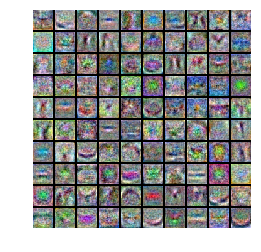

In [144]:
# visualize the weights of the best network
show_net_weights(net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [145]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.553


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*